### Clustering of Flower Species

1. Load the Data Set

In [1]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split

import numpy as np
from matplotlib import pyplot as plt

In [2]:
# load iris dataset
from sklearn.datasets import load_iris

features, target = load_iris(return_X_y=True)

2. Perform Exploratory Data Analysis & Feature Engineering

In [3]:
print(features.shape)
print(target.shape)

(150, 4)
(150,)


In [4]:
features[:15,:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2]])

In [5]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

3. Split the Data for Training & Testing

In [6]:
# Make a train/test split using 30% test size
X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                    test_size=0.30,
                                                    random_state=42)

4. Additional Preprocessing of the Data

In [7]:
# create scaler object of StandardScaler
std_scaler = StandardScaler()

# apply scaler to X using fit_transform()
X_train_std = std_scaler.fit_transform(X_train)


5. Test & Select Hyperparameter/s

E:\Labs\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


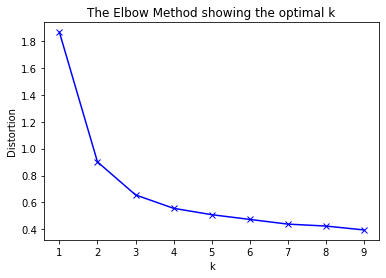

In [8]:
# Determine the value of k
from scipy.spatial.distance import cdist

distortions = []
K = range(1, 10)

for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_train)
    cost = sum(np.min(cdist(X_train, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / len(X_train)
    distortions.append(cost)

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

6. Fit a clustering Model

In [9]:
kmeans = KMeans(n_clusters=3)
kmeans = kmeans.fit(X_train)
kMeansLabels = kmeans.predict(features)
# Centroid values
centroids_sk = kmeans.cluster_centers_
#print(centroids_sk) # From sci-kit learn

In [ ]:
GMM = GaussianMixture(n_components=3, random_state=0).fit(X_train)
GMMLabels = GMM.predict(features)

7. Visualize the Clusters 

In [10]:
# pca for visualization
pca = PCA(n_components=2).fit(features)
pca_2d = pca.transform(features)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


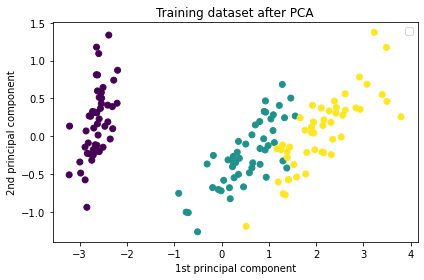

In [11]:
# visualize input dataset with PCA performed
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=target)

plt.title('Training dataset after PCA') 

plt.xlabel('1st principal component')
plt.ylabel('2nd principal component')
plt.legend(loc='upper right')
   
plt.tight_layout()

plt.show()

In [ ]:
# visualize K-Means clustered dataset with PCA performed
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=kMeansLabels)

plt.title('K-Means Clustered Training dataset after PCA') 

plt.xlabel('1st principal component')
plt.ylabel('2nd principal component')
plt.legend(loc='upper right')
   
plt.tight_layout()

plt.show()

In [ ]:
# visualize K-Means clustered dataset with PCA performed
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=GMMLabels)

plt.title('GMM based Clustered Training dataset after PCA') 

plt.xlabel('1st principal component')
plt.ylabel('2nd principal component')
plt.legend(loc='upper right')
   
plt.tight_layout()

plt.show()